Dataset shape: (70000, 784)
Labels range: [0 1 2 3 4 5 6 7 8 9]
Training samples: 56000
Testing samples: 14000

Training Logistic Regression model...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Model Evaluation:
Accuracy: 0.9202

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.93      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



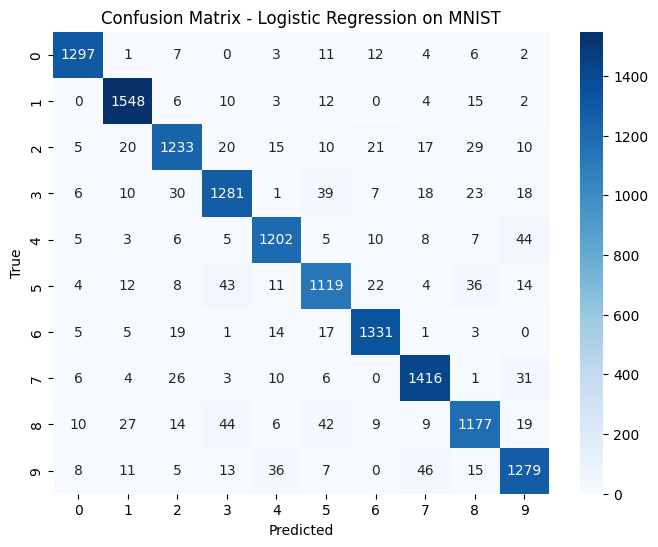

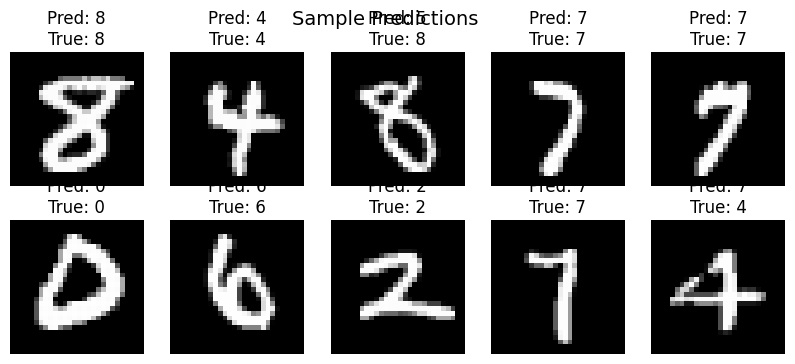

In [6]:
# =========================================================
# LOGISTIC REGRESSION ON MNIST (ready for Google Colab)
# =========================================================

# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Step 2: Load the MNIST dataset
print("Downloading MNIST dataset (this may take a minute)...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print(f"Dataset shape: {X.shape}")
print(f"Labels range: {np.unique(y)}")

# Step 3: Normalize the pixel values
X = X / 255.0  # scale 0–1

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Step 5: Train Logistic Regression model
# Using 'lbfgs' solver suitable for multiclass problems
print("\nTraining Logistic Regression model...")
log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 6: Evaluate model
y_pred = log_reg.predict(X_test)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Confusion matrix visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression on MNIST")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 8: Show some sample predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.suptitle("Sample Predictions", fontsize=14)
plt.show()
